In [1]:
import pandas as pd

In [2]:
import numpy as nm

In [3]:
data = pd.read_csv("../raw_data/monster_com-job_sample.csv")

data.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


In [4]:
data.shape

(22000, 14)

In [5]:
!pip install unidecode
!pip install --upgrade gensim

import string
import unidecode
import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 

In [6]:
def clean (text):
    
    text_urless=re.sub(r"(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*", '', text)
    
    for punctuation in string.punctuation:
        text = text_urless.replace(punctuation, ' ') # Remove Punctuation
        
    lowercased = text.lower() # Lower Case
    
    unaccented_string = unidecode.unidecode(lowercased) # remove accents
          
    tokenized = word_tokenize(unaccented_string) # Tokenize
    
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    
    stop_words = set(stopwords.words('english')) # Make stopword list
    
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    
    return without_stopwords #" ".join(without_stopwords)

In [7]:
data["clean_description"] = data["job_description"].apply(clean)
data['clean_description']

0        [teamsoft, seeing, support, specialist, join, ...
1        [wisconsin, state, journal, seeking, flexible,...
2        [report, job, job, depuy, synthes, companies, ...
3        [join, altec, considering, career, altec, neve...
4        [position, id, positions, state, ct, city, fai...
                               ...                        
21995    [major, premier, cincinnati, based, financial,...
21996    [luxury, homebuilder, cincinnati, seeking, acc...
21997    [adobe, client, location, anywhere, would, pre...
21998    [jernberg, industries, established, considered...
21999    [contract, administratorcan, point, person, di...
Name: clean_description, Length: 22000, dtype: object

In [8]:
# Masculine-coded words
masc_vocab=["active",
"adventurous",
"aggress",
"ambitio",
"analy",
"assert",
"athlet",
"autonom",
"battle",
"boast",
"challeng",
"champion",
"compet",
"confident",
"courag",
"decid",
"decision",
"decisive",
"defend",
"determin",
"domina",
"dominant",
"driven",
"fearless",
"fight",
"force",
"greedy",
"head-strong",
"headstrong",
"hierarch",
"hostil",
"impulsive",
"independen",
"individual",
"intellect",
"lead",
"logic",
"objective",
"opinion",
"outspoken",
"persist",
"principle",
"reckless",
"self-confiden",
"self-relian",
"self-sufficien",
"selfconfiden",
"selfrelian",
"selfsufficien",
"stubborn",
"superior",
"unreasonab"]

In [9]:
# Feminine,coded words
fem_vocab=["agree",
"affectionate",
"child",
"cheer",
"collab",
"commit",
"communal",
"compassion",
"connect",
"considerate",
"cooperat",
"co-operat",
"depend",
"emotiona",
"empath",
"feel",
"flatterable",
"gentle",
"honest",
"interpersonal",
"interdependen",
"interpersona",
"inter-personal",
"inter-dependen",
"inter-persona",
"kind",
"kinship",
"loyal",
"modesty",
"nag",
"nurtur",
"pleasant",
"polite",
"quiet",
"respon",
"sensitiv",
"submissive",
"support",
"sympath",
"tender",
"together",
"trust",
"understand",
"warm",
"whin",
"enthusias",
"inclusive",
"yield",
"share",
"sharin"]

In [10]:
from gensim.models import Word2Vec

word2vec_description = Word2Vec(sentences=data['clean_description'], vector_size=10, min_count=1)

/home/komiljon/.pyenv/versions/3.8.6/envs/fairjobs/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [11]:
word2vec_description.wv['team']

array([ 0.4786352 ,  1.267581  , -0.13213141, -1.0454358 , -0.54410136,
        6.8139834 ,  2.8827069 , -0.27927238,  0.21396229,  7.56064   ],
      dtype=float32)

In [12]:
test = data['clean_description'][0]
test

['teamsoft',
 'seeing',
 'support',
 'specialist',
 'join',
 'client',
 'madison',
 'wi',
 'ideal',
 'candidate',
 'must',
 'least',
 'years',
 'experience',
 'field',
 'need',
 'familiar',
 'variety',
 'field',
 'concepts',
 'practices',
 'procedures',
 'position',
 'relies',
 'extensive',
 'experience',
 'judgment',
 'plan',
 'accomplish',
 'goals',
 'required',
 'skills',
 'call',
 'tracking',
 'software',
 'phone',
 'based',
 'technical',
 'support',
 'problem',
 'documentation',
 'communication',
 'remote',
 'desktop',
 'management',
 'tools',
 'respond',
 'customer',
 'requests',
 'general',
 'understanding',
 'landesk',
 'microsoft',
 'office',
 'suitefind',
 'teamsoft',
 'madison',
 'area',
 'technology',
 'leader',
 'consultants',
 'owned',
 'operated',
 'managed',
 'consultants',
 'teamsoft',
 'clear',
 'choice',
 'career',
 'join',
 'teamsoft',
 'family',
 'today',
 'know',
 'teamsoft',
 'offers',
 'salaried',
 'options',
 'many',
 'positions',
 'include',
 'weeks',
 'pto',


In [13]:
def masc_similar_words(text):
    simil_masc_vocab = []
    match_masc_vocab = []

    n_simil_masc = 0
    n_match_masc = 0

    for word in text:
        for masc_word in masc_vocab:
            if masc_word in word2vec_description.wv.key_to_index:
                if word2vec_description.wv.similarity(word, masc_word) > 0.9 and\
                   word2vec_description.wv.similarity(word, masc_word) < 0.99:
                    n_simil_masc += 1
                    simil_masc_vocab.append((word, masc_word))
                    simil_masc_vocab = list(dict.fromkeys(simil_masc_vocab))
            if word.find(masc_word) == 0:
                n_match_masc += 1
                match_masc_vocab.append((word, masc_word))
                match_masc_vocab = list(dict.fromkeys(match_masc_vocab))
    
    return (n_simil_masc + n_match_masc)

In [14]:
def fem_similar_words(text):
    simil_fem_vocab = []
    match_fem_vocab = []

    n_simil_fem = 0
    n_match_fem = 0

    for word in text:        
        for fem_word in fem_vocab:
            if fem_word in word2vec_description.wv.key_to_index:
                if word2vec_description.wv.similarity(word, fem_word) > 0.9 and\
                   word2vec_description.wv.similarity(word, fem_word) < 0.99:
                    n_simil_fem += 1
                    simil_fem_vocab.append((word, fem_word))
                    simil_fem_vocab = list(dict.fromkeys(simil_fem_vocab))
            if word.find(fem_word) == 0:
                n_match_fem += 1
                match_fem_vocab.append((word, fem_word))
                match_fem_vocab = list(dict.fromkeys(match_fem_vocab))
    
    return (n_simil_fem + n_match_fem)

In [15]:
masc_similar_words(test)

4

In [16]:
fem_similar_words(test)

12

In [23]:
data['masc_words'] = data['clean_description'][0:22000].apply(masc_similar_words)

In [24]:
data['fem_words'] = data['clean_description'][0:22000].apply(fem_similar_words)

In [97]:
def label_race (row):
    if row['fem_words'] > row['masc_words'] :
        return 'feminine'
    elif row['fem_words'] < row['masc_words']:
        return 'masculine'
    else:
        return 'neutral'

In [98]:
data['gender'] = data.apply (lambda row: label_race(row), axis=1)

In [28]:
data['masc_coded'] = data['masc_words']/(data['masc_words'] + data['fem_words'])
data['fem_coded'] = data['fem_words']/(data['masc_words'] + data['fem_words'])
data[0:22000].round(2)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,clean_description,masc_words,fem_words,masc_coded,fem_coded
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,"[teamsoft, seeing, support, specialist, join, ...",4,12,0.25,0.75
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,"[wisconsin, state, journal, seeking, flexible,...",2,1,0.67,0.33
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,"[report, job, job, depuy, synthes, companies, ...",12,19,0.39,0.61
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783,"[join, altec, considering, career, altec, neve...",13,20,0.39,0.61
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c,"[position, id, positions, state, ct, city, fai...",6,12,0.33,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,United States of America,US,NaN,No,jobs.monster.com,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640,"[major, premier, cincinnati, based, financial,...",11,17,0.39,0.61
21996,United States of America,US,NaN,No,jobs.monster.com,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de,"[luxury, homebuilder, cincinnati, seeking, acc...",0,2,0.00,1.00
21997,United States of America,US,NaN,No,jobs.monster.com,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345,"[adobe, client, location, anywhere, would, pre...",0,0,NaN,NaN
21998,United States of America,US,NaN,No,jobs.monster.com,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b,"[jernberg, industries, established, considered...",6,6,0.50,0.50


In [69]:
data.to_csv('../basemodel_df_new.csv', encoding='utf-8')

<AxesSubplot:>

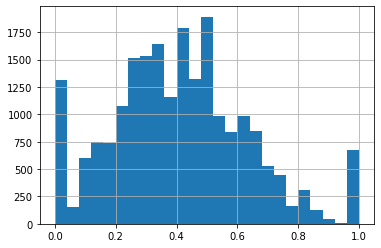

In [36]:
data['masc_coded'].hist(bins=25)

In [33]:
data.describe()

,masc_words,fem_words,masc_coded,fem_coded
count,22000.000000,22000.000000,21452.000000,21452.000000
mean,6.398636,9.018227,0.408522,0.591478
std,6.626201,7.332529,0.226107,0.226107
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.250000,0.454545
50%,5.000000,8.000000,0.400000,0.600000
75%,9.000000,13.000000,0.545455,0.750000
max,229.000000,91.000000,1.000000,1.000000


In [70]:
data

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,"[teamsoft, seeing, support, specialist, join, ...",4,12,0.250000,0.750000,feminine
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,"[wisconsin, state, journal, seeking, flexible,...",2,1,0.666667,0.333333,masculine
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,"[report, job, job, depuy, synthes, companies, ...",12,19,0.387097,0.612903,feminine
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783,"[join, altec, considering, career, altec, neve...",13,20,0.393939,0.606061,feminine
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c,"[position, id, positions, state, ct, city, fai...",6,12,0.333333,0.666667,feminine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,United States of America,US,NaN,No,jobs.monster.com,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640,"[major, premier, cincinnati, based, financial,...",11,17,0.392857,0.607143,feminine
21996,United States of America,US,NaN,No,jobs.monster.com,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de,"[luxury, homebuilder, cincinnati, seeking, acc...",0,2,0.000000,1.000000,feminine
21997,United States of America,US,NaN,No,jobs.monster.com,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345,"[adobe, client, location, anywhere, would, pre...",0,0,NaN,NaN,neutral
21998,United States of America,US,NaN,No,jobs.monster.com,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b,"[jernberg, industries, established, considered...",6,6,0.500000,0.500000,neutral


In [34]:
import gensim.downloader
glove_wiki_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [265]:
glove_wiki_vectors.most_similar('active', topn=10)

[('engaged', 0.6677765250205994),
 ('most', 0.6574021577835083),
 ('primarily', 0.6493699550628662),
 ('become', 0.642195463180542),
 ('established', 0.634493350982666),
 ('successful', 0.6301298141479492),
 ('as', 0.6294596791267395),
 ('highly', 0.6291847229003906),
 ('known', 0.6286290287971497),
 ('becoming', 0.6276501417160034)]

In [263]:
extended_fem_vocab = []

for fem_word in fem_vocab:
    match_fem_words = [key for key, val in glove_wiki_vectors.key_to_index.items() if key.find(fem_word) == 0]
    if len(match_fem_words) > 0:
        for match_fem_word in match_fem_words:
            for index in range(10):
                extended_fem_vocab.append(glove_wiki_vectors.most_similar(match_fem_word, topn=10)[index][0])
print(extended_fem_vocab)

['accord', 'agreements', 'deal', 'pact', 'negotiations', 'agreed', 'negotiated', 'talks', 'negotiating', 'signed', 'agree', 'agreement', 'decided', 'agreeing', 'deal', 'discuss', 'hoped', 'proposal', 'announced', 'would', 'accept', 'agreed', 'willing', 'consider', 'insist', 'decide', 'negotiate', 'must', 'intend', 'agreeing', 'agreement', 'accords', 'treaties', 'accord', 'pacts', 'commitments', 'pact', 'deals', 'negotiated', 'negotiations', 'refuses', 'decides', 'wants', 'accepts', 'asks', 'intends', 'agree', 'insists', 'seeks', 'fails', 'agreed', 'negotiate', 'agree', 'negotiating', 'agreement', 'accept', 'deal', 'refusing', 'insisting', 'negotiated', 'amicable', 'congenial', 'amiable', 'amenable', 'approachable', 'hospitable', 'advantageous', 'sensible', 'unappealing', 'preferable', 'entertainingly', 'unconventionally', 'unpleasantly', 'infectiously', 'blandly', 'exuberantly', 'endearingly', 'appealingly', 'outrageously', 'ostentatiously', 'unheard-of', 'pre-set', 'industry-standard'

In [266]:
extended_masc_vocab = []

for masc_word in masc_vocab:
    match_masc_words = [key for key, val in glove_wiki_vectors.key_to_index.items() if key.find(masc_word) == 0]
    if len(match_masc_words) > 0:
        for match_masc_word in match_masc_words:
            for index in range(10):
                extended_masc_vocab.append(glove_wiki_vectors.most_similar(match_masc_word, topn=10)[index][0])
print(extended_masc_vocab)

['engaged', 'most', 'primarily', 'become', 'established', 'successful', 'as', 'highly', 'known', 'becoming', 'engaged', 'aggressively', 'encouraged', 'engage', 'cooperate', 'interested', 'vigorously', 'participate', 'pursue', 'collaborate', 'usaf', 'f-15s', 'f-4s', 'combat-ready', 'vnaf', 'aircrews', 'front-line', 'f-5s', 'rcaf', 'stateside', 'applets', 'antipiracy', 'plugin', 'toolbar', 'hdcp', 'silverlight', 'applet', 'joysticks', 'javascript', 'embed', 'torvolt', 'species-rich', 'châteaux', 'best-sellers', 'gspa', 's&p', 'cypherpunks', 'amazin', 'year-end', 'movers', 'haberdashery', 'sportwear', 'casualwear', 'skiwear', 'loungewear', 'sleepwear', 'nkobi', 'rainwear', 'costumers', 'swimwear', 'webdav', 'cadivi', 'oauth', 'sfe', 'mcx', 'ntlm', 'sicom', 'tfe', 'coronagraph', 'supermontage', 'nobleness', 'rapaciousness', 'heedlessness', 'anti-colonialism', 'baseness', 'self-absorption', 'double-dealing', 'self-sustainability', 'spatiality', 'soullessness', 'e38', 'e23', 'wedi', 'drakeng

In [262]:
data['clean_description'][0]

['teamsoft',
 'seeing',
 'support',
 'specialist',
 'join',
 'client',
 'madison',
 'wi',
 'ideal',
 'candidate',
 'must',
 'least',
 'years',
 'experience',
 'field',
 'need',
 'familiar',
 'variety',
 'field',
 'concepts',
 'practices',
 'procedures',
 'position',
 'relies',
 'extensive',
 'experience',
 'judgment',
 'plan',
 'accomplish',
 'goals',
 'required',
 'skills',
 'call',
 'tracking',
 'software',
 'phone',
 'based',
 'technical',
 'support',
 'problem',
 'documentation',
 'communication',
 'remote',
 'desktop',
 'management',
 'tools',
 'respond',
 'customer',
 'requests',
 'general',
 'understanding',
 'landesk',
 'microsoft',
 'office',
 'suitefind',
 'teamsoft',
 'madison',
 'area',
 'technology',
 'leader',
 'consultants',
 'owned',
 'operated',
 'managed',
 'consultants',
 'teamsoft',
 'clear',
 'choice',
 'career',
 'join',
 'teamsoft',
 'family',
 'today',
 'know',
 'teamsoft',
 'offers',
 'salaried',
 'options',
 'many',
 'positions',
 'include',
 'weeks',
 'pto',


In [270]:
test = data['clean_description'][0]

def fem_words(text):
    n_fem_words = 0
    
    for word in text:
        if word in extended_fem_vocab:
            print(word)
            n_fem_words += 1

    return n_fem_words

fem_words(test)

support
candidate
must
experience
variety
concepts
position
relies
experience
judgment
plan
accomplish
based
support
communication
respond
understanding
leader
know
offers
salaried
business
local
experience
development
business
analysis
project
knowledgeable
friendly
help
move
offers
plan
match
know
strengths
interests
chance
position
participate
charitable
committee
charitable
committee
local
team
experience
understand
rely
consulting
consulting
experience
know
know
know
deal
take
feedback
good
working
equal
opportunity
action
plan


65

In [271]:
test = data['clean_description'][0]

def masc_words(text):
    n_masc_words = 0
    
    for word in text:
        if word in extended_masc_vocab:
            print(word)
            n_masc_words += 1

    return n_masc_words

masc_words(test)

support
candidate
must
concepts
position
judgment
plan
accomplish
based
support
leader
offers
business
local
business
analysis
knowledgeable
move
offers
plan
match
strengths
interests
chance
position
participate
local
team
consulting
consulting
take
equal
opportunity
action
plan


35

In [56]:
job_desc_enriched_list=[]
wiki_desc_enriched_list=[]

for x in masc_vocab:
    if x in word2vec_description.wv.key_to_index:
        job_desc_enriched_list+=([x]+[y[0] for y in word2vec_description.wv.most_similar(x)[:2]])
    if x in glove_wiki_vectors.key_to_index:
        wiki_desc_enriched_list+=([x]+[y[0] for y in glove_wiki_vectors.most_similar(x)[:2]])